In [1]:
import pandas as pd
import numpy as np

In [2]:
#READ DATA
data = pd.read_csv('clustering.csv')
data.head()

,Age,Income,SpendingScore,Savings
0,0.5125,0.505915,0.791329,0.327991
1,0.5250,0.536915,0.791082,0.270883
2,0.5625,0.482700,0.702657,0.462950
3,0.5250,0.479792,0.765680,0.367317
4,0.8750,0.044308,0.348778,0.843475


In [3]:
def setup(data, 
          normalize = False):
    
    global X, seed
    
    if normalize == False:
        X = data
        import random
        seed = random.randint(150,900)
        
    else:
        pass

In [4]:
setup(data)

In [5]:
def create_model(estimator = 'kmean', n=4):
    
    if estimator == 'kmean':
        from sklearn.cluster import KMeans
        model = KMeans(n, random_state=seed)
        
    elif estimator == 'ap':
        from sklearn.cluster import AffinityPropagation
        model = AffinityPropagation()
        
    elif estimator == 'meanshift':
        from sklearn.cluster import MeanShift
        model = MeanShift()
        
    elif estimator == 'sc':
        from sklearn.cluster import SpectralClustering
        model = SpectralClustering(n_clusters=n, random_state=seed, n_jobs=-1)    
        
    elif estimator == 'hclust':
        from sklearn.cluster import AgglomerativeClustering
        model = AgglomerativeClustering(n_clusters=n)    
        
    elif estimator == 'dbscan':
        from sklearn.cluster import DBSCAN
        model = DBSCAN(n_jobs=-1)
        
    elif estimator == 'optics':
        from sklearn.cluster import OPTICS
        model = OPTICS(n_jobs=-1)    
        
    elif estimator == 'birch':
        from sklearn.cluster import Birch
        model = Birch(n_clusters=n)  
        
    model.fit(X)
    return model

In [6]:
def assign_model(model):
        
    X_ = X.copy()
    pred_labels = model.labels_
    X_['Cluster'] = pred_labels
    return X_

In [7]:
def predict_model(model, df):
       
    df_ = df.copy()
    pred_labels = model.predict(df_)
    df_['Cluster'] = pred_labels
    return df_

In [104]:
def plot_model(model, type='elbow'):
    
    import warnings
    warnings.filterwarnings('ignore')

    if type == 'elbow':
        from sklearn.cluster import KMeans
        from yellowbrick.cluster import KElbowVisualizer
        KMean = KMeans(4, random_state=seed)
        visualizer = KElbowVisualizer(KMean,timings=False)
        visualizer.fit(X)
        visualizer.poof()
        
    if type == 'silhouette':
        from yellowbrick.cluster import SilhouetteVisualizer
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
        visualizer.fit(X)
        visualizer.poof()
        
    if type == 'distance':    
        from yellowbrick.cluster import InterclusterDistance
        visualizer = InterclusterDistance(model)
        visualizer.fit(X)
        visualizer.poof()
        
    if type == 'cluster':
        model_plot = model.drop(['Cluster'], axis=1)
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        pca_ = pca.fit_transform(model_plot)
        pca_ = pd.DataFrame(pca_)
        pca_ = pca_.rename(columns={0: "PCA1", 1: "PCA2"})
        pca_['Cluster'] = model.Cluster
        import seaborn as sns
        import matplotlib as plt
        sns.scatterplot(x='PCA1', y='PCA2',data=pca_, hue='Cluster', palette='coolwarm', legend='full')
        #ax = plt.gca()
        #ax.set_title("Scatter Plot based on PCA1 / PCA2")

In [106]:
def save_model(model, model_name):
    from sklearn.externals import joblib
    model_name = model_name + '.pkl'
    joblib.dump(model, model_name)

In [107]:
def load_model(model_name):
    from sklearn.externals import joblib
    model_name = model_name + '.pkl'
    return joblib.load(model_name)

## Execution Starts Here 

In [30]:
#initialize setup
setup(data)

In [82]:
#create simple kmean cluster
kmean = create_model()

In [87]:
#print the model
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=755, tol=0.0001, verbose=0)

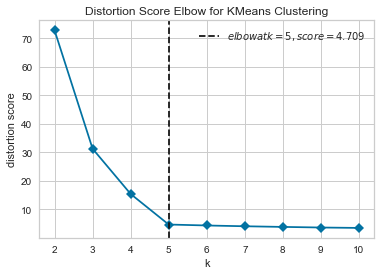

In [86]:
#plot elbow
plot_model(kmean)

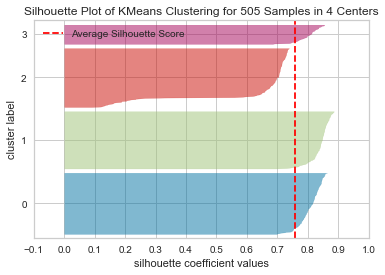

In [88]:
#plot silhouette
plot_model(kmean, 'silhouette')

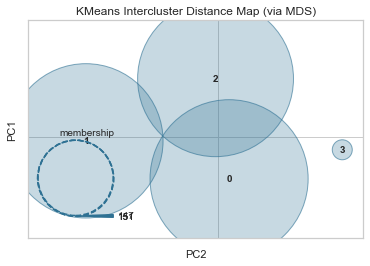

In [92]:
#plot distance
plot_model(kmean, 'distance')

In [95]:
#assign cluster
df_new = assign_model(kmean)

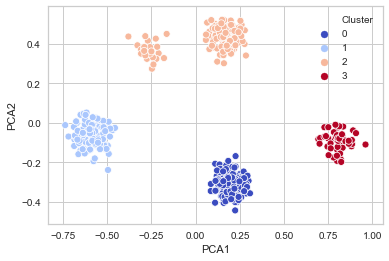

In [105]:
#plot clusters
plot_model(df_new, 'cluster')